In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
%matplotlib inline

In [0]:
from google.colab import files

In [3]:
#Upload train data set file from local to colabs area
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
# Load Train dataset
train = pd.read_csv("train.csv")
train.head(5).append(train.tail(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136

In [4]:
#Upload train data set file from local to colabs area
uploaded = files.upload()

MessageError: ignored

In [5]:
# Load Test dataset
test = pd.read_csv("test.csv")
test.head(5).append(test.tail(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,

In [0]:
important_columns = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'OverallQual', 'GarageCars', '1stFlrSF']
column_color = ['red', 'green', 'yellow', 'brown', 'orange', 'black', 'purple', 'pink']

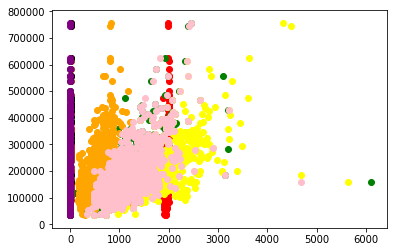

In [7]:
i=0
for column in important_columns:
  plt.scatter(train.loc[:,column], train.loc[:,"SalePrice"], c=column_color[i])
  i = i+1

In [0]:
train2 = train[(train.GrLivArea < 3000) & (train.SalePrice < 500000)]

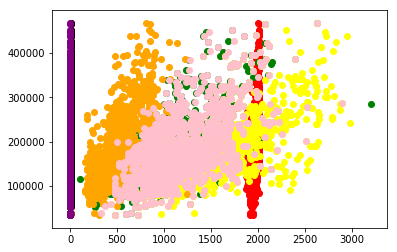

In [9]:
i=0
for column in important_columns:
  plt.scatter(train2.loc[:,column], train2.loc[:,"SalePrice"], c=column_color[i])
  i = i+1

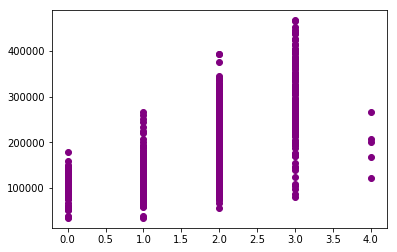

In [10]:
plt.scatter(train2.loc[:,"GarageCars"], train2.loc[:,"SalePrice"], c='purple')

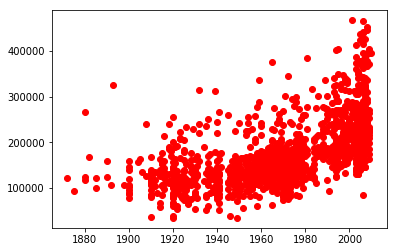

In [11]:
plt.scatter(train2.loc[:,"YearBuilt"], train2.loc[:,"SalePrice"], c='red')

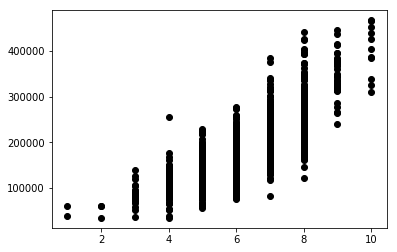

In [12]:
plt.scatter(train2.loc[:,"OverallQual"], train2.loc[:,"SalePrice"], c='black')

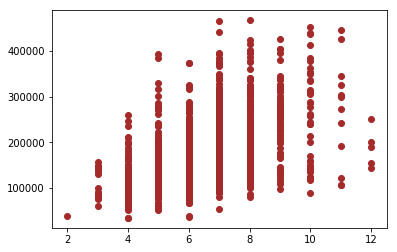

In [13]:
plt.scatter(train2.loc[:,"TotRmsAbvGrd"], train2.loc[:,"SalePrice"], c='brown')

In [0]:
important_columns.remove('TotRmsAbvGrd')

In [15]:
important_columns

['YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageArea',
 'OverallQual',
 'GarageCars',
 '1stFlrSF']

In [0]:
column_color.remove('brown')

In [17]:
column_color

['red', 'green', 'yellow', 'orange', 'black', 'purple', 'pink']

In [0]:
# Scores according to Kaggle challenge metric
def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(np.abs(y_pred))))

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
# Prediction with two input variables

X = train2.loc[:,important_columns]
y = train2.loc[:,'SalePrice']

In [21]:
mae, kaggle, mape = [], [], []
for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    #X = X.fillna(X.mean()) #is this ok?
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model_1 = lm.fit(X_train, y_train)
    test_predictions = model_1.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model_1.intercept_)
combined = np.vstack((important_columns, model_1.coef_)).T
print(combined)

Test MAE: 22163.481297201855
Test Kaggle-Score: 0.21193246244884176
Test MAPE: 13.74593561094586
Intercept: -772462.3090670693
[['YearBuilt' '355.73593720857775']
 ['TotalBsmtSF' '30.129165155822335']
 ['GrLivArea' '48.197704363291614']
 ['GarageArea' '42.32632057194353']
 ['OverallQual' '18398.075976942047']
 ['GarageCars' '867.0264399641071']
 ['1stFlrSF' '11.051997455926802']]


In [22]:
# Run linear regression with top correlated 10 attributes with SalePrice
cors = train.corr(); 
top10 = cors.loc[:, "SalePrice"].sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train2.loc[:,top10]
y = train2.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model_2 = lm.fit(X_train, y_train)
    test_predictions = model_2.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model_2.intercept_)
combined = np.vstack((top10, model_2.coef_)).T
print(combined)

Test MAE: 21274.349047923624
Test Kaggle-Score: 0.19548707565790868
Test MAPE: 13.40575285014152
Intercept: -1424887.4944961409
[['OverallQual' '15254.631739035885']
 ['GrLivArea' '65.37073413029322']
 ['GarageCars' '1861.6179741807182']
 ['GarageArea' '42.19159029540792']
 ['TotalBsmtSF' '24.816651689973234']
 ['1stFlrSF' '10.7693214880942']
 ['FullBath' '-11433.542685064189']
 ['TotRmsAbvGrd' '-3090.3535740502516']
 ['YearBuilt' '376.5962150113459']
 ['YearRemodAdd' '325.6654237936226']]


In [23]:
from sklearn.preprocessing import MinMaxScaler
X = train2.loc[:,important_columns]
y = train2.loc[:,'SalePrice']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# test set should be scaled with the scaler trained on the training set.
X_test_scaled = scaler.transform(X_test)

lm = linear_model.LinearRegression()
model_3 = lm.fit(X_train_scaled, y_train)
test_predictions = model_3.predict(X_test_scaled)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test Kaggle-score:", kaggle_score(y_test, test_predictions))
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))
print(X_train_scaled)

Test MAE: 21629.856424038255
Test Kaggle-score: 0.18875328032201355
Test MAPE: 13.743458658228928
[[0.73913043 0.34219521 0.58320726 ... 0.55555556 0.5        0.2375195 ]
 [0.65942029 0.36840106 0.24054463 ... 0.44444444 0.5        0.24804992]
 [0.92753623 0.6190657  0.49016641 ... 0.66666667 0.5        0.50546022]
 ...
 [0.34782609 0.24192936 0.37897126 ... 0.33333333 0.25       0.21957878]
 [0.70289855 0.35624763 0.2473525  ... 0.55555556 0.5        0.2550702 ]
 [0.94202899 0.32662362 0.61497731 ... 0.55555556 0.5        0.20514821]]


In [24]:
X[important_columns].head()

,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,OverallQual,GarageCars,1stFlrSF
0,2003,856,1710,548,7,2,856
1,1976,1262,1262,460,6,2,1262
2,2001,920,1786,608,7,2,920
3,1915,756,1717,642,7,3,961
4,2000,1145,2198,836,8,3,1145


In [0]:
#score_tables = ['f1_macro', 'precision_macro', 'recall_macro', 'neg_mean_absolute_error']

In [26]:
# Cross validation with a single line
X = X.fillna(X.mean()) #!!! Test data is used in the mean
result = cross_val_score(model_1, X, y, scoring="neg_mean_absolute_error", cv = 5)
print("Score : " ,result)

Score :  [-22081.41701581 -22180.62760234 -21568.41988638 -21264.62506348
 -22243.62269301]


In [27]:
X = X.fillna(X.mean()) #!!! Test data is used in the mean
result2 = cross_val_score(model_1, X, y, scoring="neg_mean_absolute_error", cv = 10)
print("Score : " ,result2)

Score :  [-21730.700854   -22680.87732308 -21595.81937575 -22775.08869651
 -25130.11656229 -18399.73155607 -20418.13839485 -21623.51689276
 -22481.91017593 -21693.06910111]


In [28]:
from sklearn.preprocessing import PolynomialFeatures
X = train2.loc[:,important_columns]
y = train2.loc[:,'SalePrice']
X = X.fillna(X.mean())
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    print(X_train.shape)
    print(y_train.shape)
    #X = X.fillna(X.mean()) #is this ok?
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model_4 = lm.fit(X_train, y_train)
    test_predictions = model_4.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model_4.intercept_)
print(X);

(1293, 35)
(1293,)
(1293, 35)
(1293,)
(1293, 35)
(1293,)
(1293, 35)
(1293,)
(1293, 35)
(1293,)
(1293, 35)
(1293,)
(1293, 35)
(1293,)
(1293, 35)
(1293,)
(1293, 35)
(1293,)
Test MAE: 18754.736434036484
Test Kaggle-Score: 0.16730997593149208
Test MAPE: 12.330675956075785
Intercept: -3323698.69980919
[[2.003000e+03 8.560000e+02 1.710000e+03 ... 4.000000e+00 1.712000e+03
  7.327360e+05]
 [1.976000e+03 1.262000e+03 1.262000e+03 ... 4.000000e+00 2.524000e+03
  1.592644e+06]
 [2.001000e+03 9.200000e+02 1.786000e+03 ... 4.000000e+00 1.840000e+03
  8.464000e+05]
 ...
 [1.941000e+03 1.152000e+03 2.340000e+03 ... 1.000000e+00 1.188000e+03
  1.411344e+06]
 [1.950000e+03 1.078000e+03 1.078000e+03 ... 1.000000e+00 1.078000e+03
  1.162084e+06]
 [1.965000e+03 1.256000e+03 1.256000e+03 ... 1.000000e+00 1.256000e+03
  1.577536e+06]]


In [29]:
y_train.shape

(1293,)

In [0]:
test['SalePrice'] = 0

In [31]:
X_train.shape, test[important_columns].shape

((1293, 35), (1459, 7))

In [32]:
test['YearBuilt'].unique()

array([1961, 1958, 1997, 1998, 1992, 1993, 1990, 1970, 1999, 1971, 1975,
       2009, 2005, 2003, 2002, 2006, 2004, 1920, 1974, 2000, 2010, 1967,
       1978, 1966, 1964, 1962, 1952, 1949, 1959, 1956, 1955, 1948, 1960,
       1963, 1900, 1957, 1938, 1923, 1890, 1910, 1922, 1950, 1925, 1939,
       1940, 1942, 1936, 1930, 1915, 1912, 1917, 1907, 1968, 1977, 1927,
       1947, 1954, 1987, 1996, 1972, 1945, 1924, 1931, 1941, 1994, 1989,
       1921, 1896, 1976, 2008, 1965, 1973, 1984, 1985, 1991, 1969, 1995,
       1980, 2007, 1986, 1981, 1951, 1953, 1935, 1902, 1946, 1934, 1983,
       1880, 1979, 2001, 1916, 1918, 1988, 1937, 1905, 1928, 1926, 1929,
       1914, 1895, 1982, 1879, 1901, 1919, 1932])

In [0]:
# Replace Numpy Nan values with 0 and 'nan'
for col in test[important_columns]:
  test[col].fillna(value=0, inplace=True)

In [0]:
X = train2.loc[:,important_columns]
y = train2.loc[:,'SalePrice']

#X_train, X_test, y_train, y_test = train_test_split(X, test, test_size=0.15)
#X = X.fillna(X.mean()) #is this ok?
X_train = X.fillna(X.mean())
y_train = y.fillna(y.mean())

In [35]:
important_columns

['YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageArea',
 'OverallQual',
 'GarageCars',
 '1stFlrSF']

In [0]:
X = train2.loc[:,important_columns]
y = train2.loc[:,'SalePrice']

#X_train, X_test, y_train, y_test = train_test_split(X, test, test_size=0.15)
#X = X.fillna(X.mean()) #is this ok?
X_train = X.fillna(X.mean())
y_train = y.fillna(y.mean())

lm = linear_model.LinearRegression()
model_reg = lm.fit(X_train, y_train)
test_predictions = model_reg.predict(test[important_columns])

In [37]:
test_predictions

array([127010.40676823, 166949.81040833, 168885.5012902 , ...,
       151671.26466992, 113226.35176176, 232908.66956346])

In [0]:
test['SalePrice'] = test_predictions

In [39]:
test['SalePrice'].head()

0    127010.406768
1    166949.810408
2    168885.501290
3    185749.515723
4    219878.510135
Name: SalePrice, dtype: float64

In [0]:
#Create result dataframe
result_df = pd.DataFrame()

In [0]:
#Copy house Id from test data set
result_df['Id'] = test['Id'].astype(np.int64)

In [0]:
#Set result saleprice
result_df["SalePrice"] = test_predictions

In [43]:
result_df.head()

,Id,SalePrice
0,1461,127010.406768
1,1462,166949.810408
2,1463,168885.501290
3,1464,185749.515723
4,1465,219878.510135


In [0]:
#Export dataframe as a csv
result_df.to_csv("result_submission_V3.csv", index=0)

In [55]:
X = train2.loc[:,important_columns]
X_Test = test.loc[:,important_columns]
Y = train2.loc[:,'SalePrice']
X_train = X.fillna(X.mean())
Y_train = Y.fillna(Y.mean())
print(X_train.shape)
print(X_Test.shape)

#poly = PolynomialFeatures(degree=2, include_bias=False)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.fit_transform(X_Test)


print(X_train_transform.shape)
print(X_test_transform.shape)


#Y = poly.fit_transform(y)
lm = linear_model.LinearRegression()
model_poly_reg = lm.fit(X_train_transform, y)
test_prediction_v3 = lm.predict(X_test_transform)
test_prediction_v3

(1437, 7)
(1459, 7)
(1437, 35)
(1459, 35)


array([132411.2504712 , 159175.49653192, 170969.46476004, ...,
       144465.77987096, 114577.38639255, 236892.46641271])

In [0]:
#Create result dataframe
result_df_2 = pd.DataFrame()

In [0]:
#Copy house Id from test data set
result_df_2['Id'] = test['Id'].astype(np.int64)

In [0]:
#Set result saleprice
result_df_2["SalePrice"] = test_prediction_v3

In [59]:
result_df_2.head()

,Id,SalePrice
0,1461,132411.250471
1,1462,159175.496532
2,1463,170969.464760
3,1464,181995.304276
4,1465,212908.005012


In [0]:
#Export dataframe as a csv
result_df_2.to_csv("result_submission_polynomial_V3.csv", index=0)